In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as mp
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
import statistics as stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virus-prediction/GDSC_DS/Sample.csv
/kaggle/input/virus-prediction/GDSC_DS/Train.csv
/kaggle/input/virus-prediction/GDSC_DS/Test.csv


In [114]:
Data=pd.read_csv(r"../input/virus-prediction/GDSC_DS/Train.csv")
#Data.describe()
Data=pd.DataFrame(Data)
Data.describe()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,Loss of smell,Nausea,Diarrhea,Misc Symptom 1,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age
count,412.000000,412.000000,412.000000,412.000000,412.000000,402.000000,412.000000,412.000000,402.000000,411.000000,411.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,290.992718,2.165049,1.941748,1.553398,0.094660,0.763682,0.701456,0.783981,0.174129,1.277372,1.423358,0.905340,1.133495,0.398058,0.480583,0.604369,0.973301,0.058252,0.689320,37.308252
std,166.180939,0.652110,0.698629,0.898533,0.428056,1.064679,1.011225,0.873751,0.639145,1.158615,0.942668,1.139117,1.181423,0.755706,0.826632,0.982217,1.163837,0.329425,1.013573,14.135756
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.750000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,288.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,428.250000,3.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,49.250000
max,587.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


In [115]:
Data.info()
Data_cat= Data[
[ 'Cough', 'Fatigue', 'body aches', 'Loss of taste', 'Loss of smell','Nausea', 'Diarrhea','Misc Symptom 1', 'Congestion', 'Sore throat', 'Misc Symptom 2',
       'Misc Symptom 3', 'Misc Symptom 4', 'Misc Symptom 5', 'Misc Symptom 6',
       'Misc Symptom 7']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     412 non-null    int64  
 1   Cough                  412 non-null    int64  
 2   Shortness of breath    412 non-null    int64  
 3   Fatigue                412 non-null    int64  
 4   body aches             412 non-null    int64  
 5   Headache               402 non-null    float64
 6   Loss of taste          412 non-null    int64  
 7   family history         412 non-null    object 
 8   Loss of smell          412 non-null    int64  
 9   Nausea                 402 non-null    float64
 10  Diarrhea               411 non-null    float64
 11  Misc Symptom 1         411 non-null    float64
 12  Congestion             412 non-null    int64  
 13  Sore throat            412 non-null    int64  
 14  Region                 412 non-null    object 
 15  Misc S

<AxesSubplot:ylabel='Variant'>

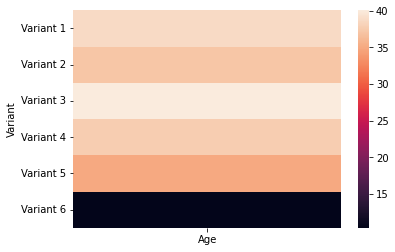

In [116]:
piv=pd.pivot_table(Data,index=["Variant"],values=["Age"])
sns.heatmap(piv)

From the above pivot we get to know the avg age of people being affected by different variants of viruses
We infer, variants 1,2,3,4,5 affect mostly the middle age people while variant 6 is affecting children

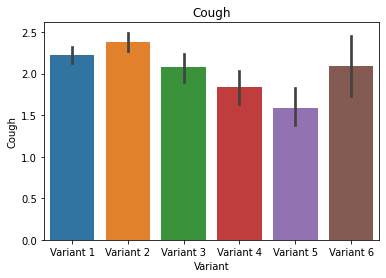

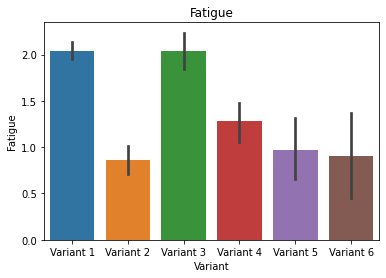

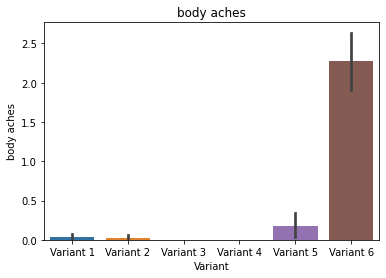

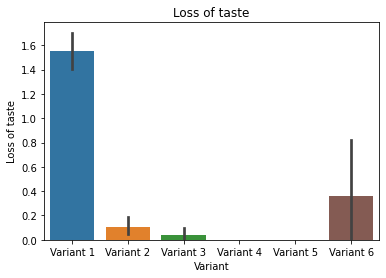

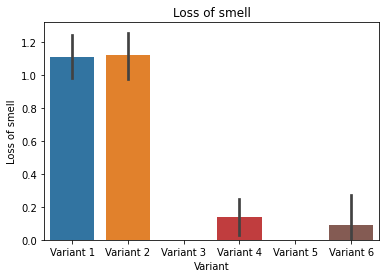

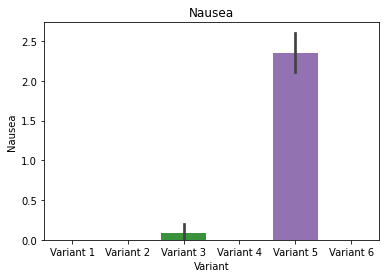

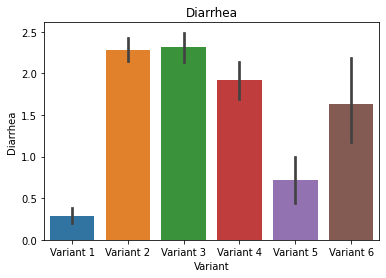

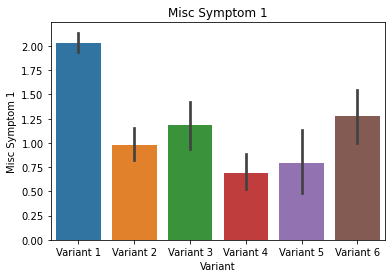

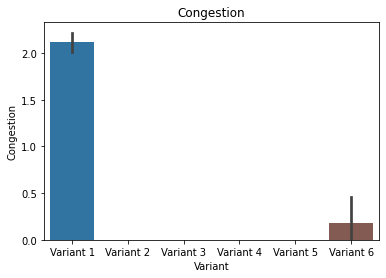

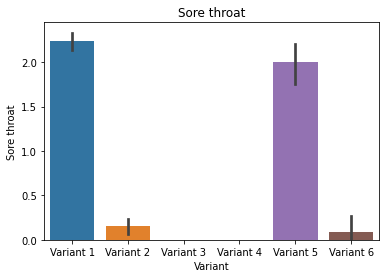

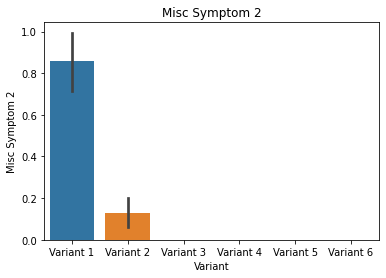

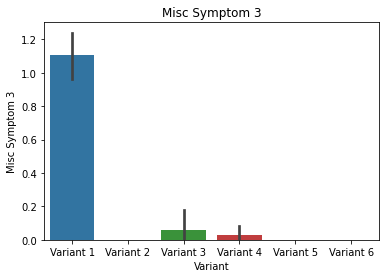

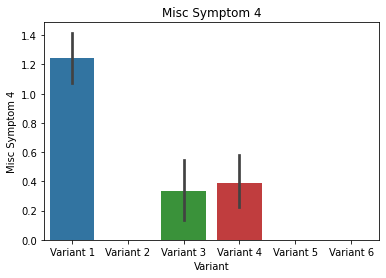

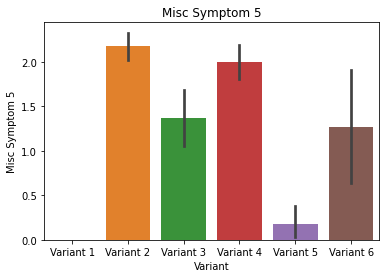

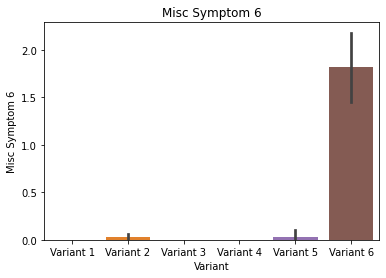

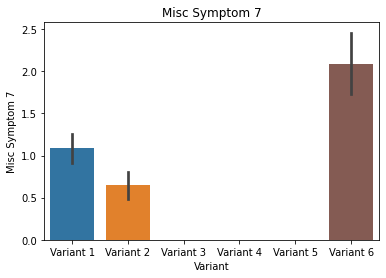

In [117]:
for i in Data_cat.columns:
    sns.barplot(x=Data["Variant"],y=Data_cat[i]).set_title(i)
    mp.show()


<AxesSubplot:>

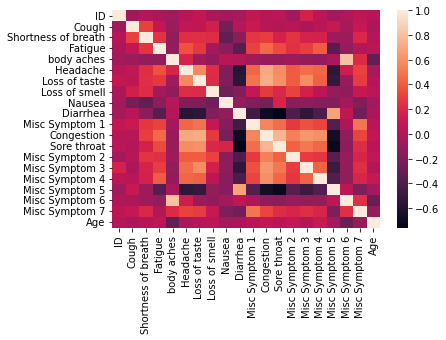

In [118]:
corr=Data.corr()
sns.heatmap(corr)

From the above bar plots we infer that 
Cough is a common symptom to almost the variants, 
Fatigue is mainly caused by Variant 1 and 3,
bodyaches caused by variant 6 most of the cases
loss of taste is symptom of variant_1 in most of the cases
Loss of smell caused variant 1 and 2
Nausea in most of the cases is caused by variant 5
Diarreha is common for variant 2,3,4 and in some cases variant 6
congestion is Variant 1 majorly
Sore throat Variant 1 as well as 5
Misc Symptom 1 mostly caused by variant 1 but also seen in case for all other variants
Misc_2, & misc_3 are caused by Variant 1
misc_4 variant 1 mostly, but also caused by 3 and 4 but less
misc 5 is observed for Variants 2,3,4 &6
misc_6 and misc_7 is majorly caused by Variant 6

In [119]:
# Data preprocessing
Data.Headache=Data.Headache.fillna(stats.mode(Data["Headache"]))

Data.Nausea=Data.Nausea.fillna(stats.mode(Data.Nausea))

Data.Diarrhea=Data.Diarrhea.fillna(stats.mode(Data.Diarrhea))

Data["Misc Symptom 1"]=Data["Misc Symptom 1"].fillna(stats.mode(Data["Misc Symptom 1"]))

Data["Pre-existing symptoms"]=Data["Pre-existing symptoms"].replace("?",stats.mode(Data["Pre-existing symptoms"]))
Data["Pre-existing symptoms"]=Data["Pre-existing symptoms"].fillna(0)
# Replacing Categorical Data
fh=pd.get_dummies(Data["family history"])
reg=pd.get_dummies(Data["Region"])
vir=pd.get_dummies(Data["Variant"])
Final= pd.concat([Data,fh,reg,vir],axis='columns')
Final=Final.drop(["Region","family history"],axis='columns')
#print(Final)
Final.isnull().sum()

ID                       0
Cough                    0
Shortness of breath      0
Fatigue                  0
body aches               0
Headache                 0
Loss of taste            0
Loss of smell            0
Nausea                   0
Diarrhea                 0
Misc Symptom 1           0
Congestion               0
Sore throat              0
Misc Symptom 2           0
Misc Symptom 3           0
Misc Symptom 4           0
Misc Symptom 5           0
Misc Symptom 6           0
Misc Symptom 7           0
Pre-existing symptoms    0
Age                      0
Variant                  0
No                       0
Yes                      0
Africa                   0
Americas                 0
East Mediterranean       0
Europe                   0
Variant 1                0
Variant 2                0
Variant 3                0
Variant 4                0
Variant 5                0
Variant 6                0
dtype: int64

This was done as there is no value available for the particular column,0 here is a categorical value representing that a particular variant has no effect

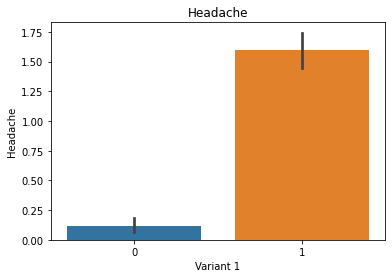

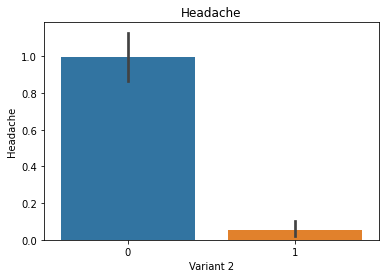

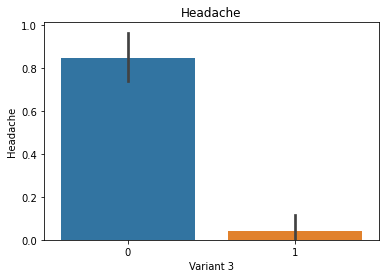

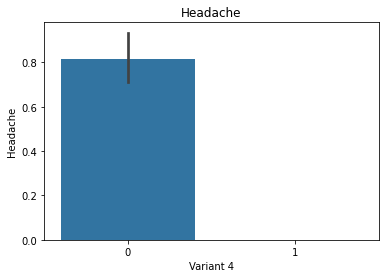

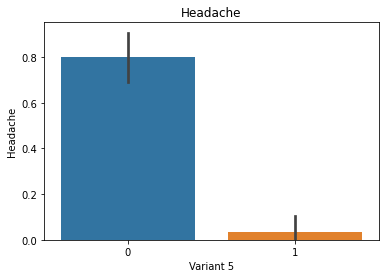

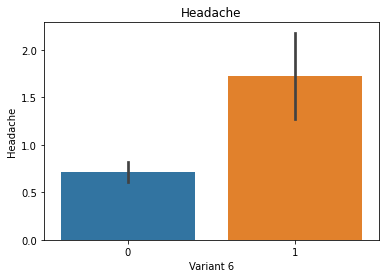

In [120]:
for i in ["Variant 1","Variant 2","Variant 3","Variant 4","Variant 5","Variant 6"]:
    sns.barplot(x=Final[i],y=Final["Headache"]).set_title("Headache")
    mp.show()

Here after filling null values for "Headache" we check which variant causes Headache majorly i.e. Variant 6 and variant 1

<AxesSubplot:ylabel='Variant 1-Variant 2-Variant 3-Variant 4-Variant 5-Variant 6'>

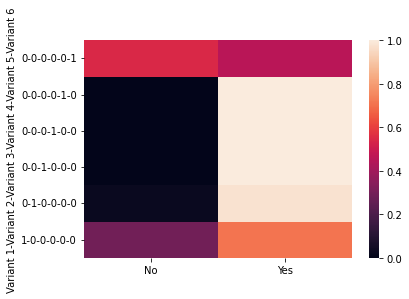

In [121]:
sct=pd.pivot_table(Final,index=["Variant 1","Variant 2","Variant 3","Variant 4","Variant 5","Variant 6"],values=["Yes","No"])
sns.heatmap(sct)

From this we can infer Variant 2,3,4,5 Depend on Family history while Variant 6 can be said that it does not depend the Family history

<AxesSubplot:ylabel='Variant 1-Variant 2-Variant 3-Variant 4-Variant 5-Variant 6'>

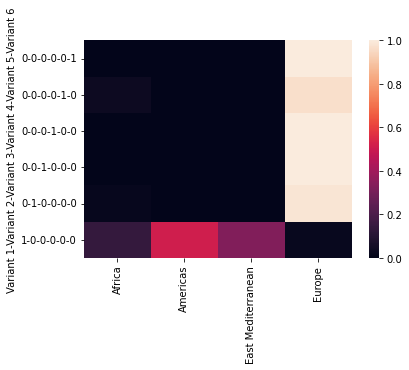

In [122]:
sct=pd.pivot_table(Final,index=["Variant 1","Variant 2","Variant 3","Variant 4","Variant 5","Variant 6"],values=["Europe","Africa","Americas","East Mediterranean"])
sns.heatmap(sct)

Variants 2 to 6 can infered to be highly linked with Europe while Variant 1 is more related to other regions except Europe

In [123]:
# Data modeling
tes=["Variant 1","Variant 2","Variant 3","Variant 4","Variant 5","Variant 6"]
y=Final[tes]
features = ["body aches",'Congestion','Nausea',"Misc Symptom 6",'Misc Symptom 1','Misc Symptom 2','Misc Symptom 3', 'Misc Symptom 4', 'Misc Symptom 5','Shortness of breath','Misc Symptom 7','Fatigue','Loss of taste','Loss of smell',"Headache","Cough",'Sore throat',"Age"]
#"Cough",'Misc Symptom 3', 'Misc Symptom 4', 'Misc Symptom 5', 'Misc Symptom 6',"No","Yes","Africa","Americas","East Mediterranean","Europe",'Misc Symptom 1'
#'Misc Symptom 7',"Pre-existing symptoms","Age","Headache",'Shortness of breath', 
X = Final[features]
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#Defining a random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(train_X, train_y)
rf_model.score(train_X,train_y)


0.9691339997129477

In [124]:
test_data=pd.read_csv(r"../input/virus-prediction/GDSC_DS/Test.csv")
test_data=pd.DataFrame(test_data)
fh=pd.get_dummies(test_data["family history"])
reg=pd.get_dummies(test_data["Region"])
test_data=pd.concat([test_data,fh,reg],axis="columns")
test_data=test_data.drop(["Region","family history"],axis='columns')
#test_data["Pre-existing symptoms"]=test_data["Pre-existing symptoms"].fillna(0)
#test_data.isnull().sum()
test_X=test_data[features]
test_preds=rf_model.predict(test_X)
var=[]
for a in test_preds:
    i=(np.where(a==np.max(a)))[0][0]
    var.append("Variant "+str(i+1))
#print(var)
output= pd.DataFrame({"ID":test_data.ID,"Variant":var})
output.to_csv('Submission_29012003.csv', index=False)